In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.neural_network import MLPClassifier
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import texthero as hero

## I. Jeu de donnée Kaagle

- EXPLORATION DU JEU DE DONNEE

In [7]:
df = pd.read_csv("Emotion_final.csv")
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [8]:
df = pd.read_csv("Emotion_final.csv")
df .describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


In [9]:
df.groupby('Text').describe()

Emotion                  \
                                                     count unique      top   
Text                                                                         
 At least if there 's a human being there you c...       1      1    anger   
 Do n't be cro                                           1      1    anger   
 Do n't look so horrifi                                  1      1     fear   
 I 'll have the use of a locker at the airport ...       1      1  sadness   
 I 'm delighted about t                                  1      1    happy   
...                                                    ...    ...      ...   
when we stayed in vienna with our class                  1      1     fear   
when we were able to afford a new sofa a leathe...       1      1    happy   
whenever i put myself in others shoes and try t...       1      1    anger   
while cycling in the country                             1      1     fear   
winning a rowing race at a karapiro regatta wit...       1      1    happy   

                                                         
                                                   freq  
Text                                                     
 At least if there 's a human being there you c...    1  
 Do n't be cro                                        1  
 Do n't look so horrifi                               1  
 I 'll have the use of a locker at the airport ...    1  
 I 'm delighted about t                               1  
...                                                 ...  
when we stayed in vienna with our class               1  
when we were able to afford a new sofa a leathe...    1  
whenever i put myself in others shoes and try t...    1  
while cycling in the country                          1  
winning a rowing race at a karapiro regatta wit...    1  

[21405 rows x 4 columns]

/home/valentin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Text', ylabel='count'>

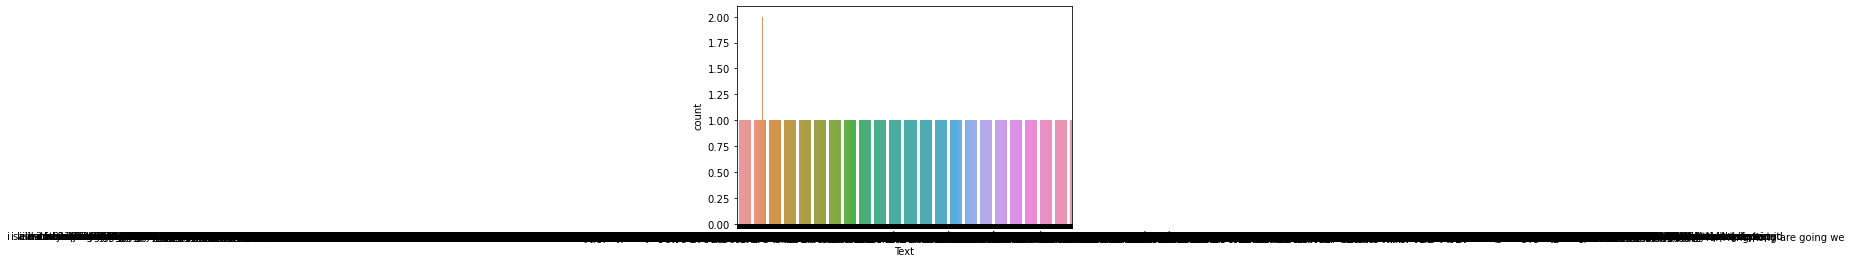

In [10]:
sns.countplot('Text', data=df)

* FEATURE ENGERING

In [18]:
df['lenght'] = df['Text'].apply(len)

In [19]:
df.head()

,Text,Emotion,clean_text,lenght
0,i didnt feel humiliated,sadness,didnt feel humiliated,23
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,108
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,48
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,92
4,i am feeling grouchy,anger,feeling grouchy,20


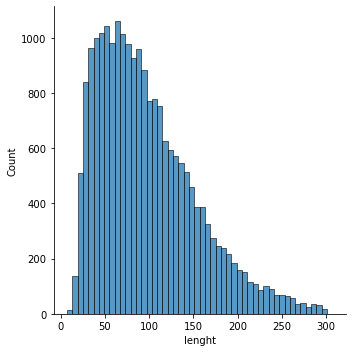

In [20]:
sns.displot(df['lenght'], bins = 50); 

In [21]:
df['lenght'].describe()

count    21459.000000
mean        96.712289
std         55.385036
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        307.000000
Name: lenght, dtype: float64

* PRE-PROCESSING

In [33]:
from nltk.corpus import stopwords
import string

In [34]:
stopwords.words('english')[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def text_processing(Text):
    remove_punc = [c for c in Text if c not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [w for w in remove_punc.split() if w.lower() not in stopwords.words('english')]

In [38]:
df.head()

,Text,Emotion,clean_text,lenght
0,i didnt feel humiliated,sadness,didnt feel humiliated,23
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,108
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,48
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,92
4,i am feeling grouchy,anger,feeling grouchy,20


In [39]:
df['Text'].apply(text_processing)

0                                [didnt, feel, humiliated]
1        [go, feeling, hopeless, damned, hopeful, aroun...
2        [im, grabbing, minute, post, feel, greedy, wrong]
3        [ever, feeling, nostalgic, fireplace, know, st...
4                                       [feeling, grouchy]
                               ...                        
21454                      [Melissa, stared, friend, dism]
21455    [Successive, state, elections, seen, governing...
21456                         [Vincent, irritated, dismay]
21457    [KendallHume, turned, back, face, dismayed, coup]
21458                                  [dismayed, surpris]
Name: Text, Length: 21459, dtype: object

* VECTORISATION

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv_transformer = CountVectorizer(analyzer=text_processing).fit(df['Text'])

In [46]:
len(cv_transformer.vocabulary_)

19763

In [48]:
text_0 = df['Text'][0]

In [49]:
text_0

'i didnt feel humiliated'

In [50]:
bow_0 = cv_transformer.transform([text_0])

In [54]:
df['Text'][2]

'im grabbing a minute to post i feel greedy wrong'

In [52]:
print(bow_0)
print(bow_0.shape)

  (0, 5699)	1
  (0, 7286)	1
  (0, 9135)	1
(1, 19763)


In [56]:
cv_transformer.get_feature_names()[1833]

'amiss'

In [57]:
text_messages_bow = cv_transformer.transform(df['Text'])

In [60]:
print(f'Shape of the Sparse Matrix: {text_messages_bow.shape}')
print(f"Amount of Non-Zero Occurances : {text_messages_bow.nnz}")

Shape of the Sparse Matrix: (21459, 19763)
Amount of Non-Zero Occurances : 193811


In [65]:
sparcity = text_messages_bow.nnz / (text_messages_bow.shape[0] * text_messages_bow.shape[1])

In [66]:
print(f'Sparcity: {sparcity}')

Sparcity: 0.0004569998651974073


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_text, df.Emotion, train_size=0.85, random_state=2, shuffle=True)
X_test, X_valid, y_test, y_valid = train_test_split(X_train, y_train, train_size=0.5, random_state=2, shuffle=True)

## II. Jeu de donnée data world 

- EXPLORATION DU JEU DE DONNEE 

In [70]:
df2 = pd.read_csv("text_emotion.csv")
df2

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [69]:
df2.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [72]:
df2.groupby('tweet_id').describe()

sentiment                        author                         \
               count unique        top freq  count unique             top   
tweet_id                                                                    
1693956175         1      1      empty    1      1      1            imba   
1693956189         1      1   surprise    1      1      1        pinkpebs   
1693956239         1      1    neutral    1      1      1  KikiFitzgerald   
1693956292         1      1    neutral    1      1      1     ShareaMonyc   
1693956462         1      1  happiness    1      1      1     bellasaurus   
...              ...    ...        ...  ...    ...    ...             ...   
1966440188         1      1     relief    1      1      1    mattnlanie09   
1966440461         1      1   surprise    1      1      1       northirid   
1966440558         1      1    neutral    1      1      1        chelikay   
1966441150         1      1   surprise    1      1      1   Megan_Parrell   
1966441171         1      1      worry    1      1      1     Boddingtons   

                content         \
           freq   count unique   
tweet_id                         
1693956175    1       1      1   
1693956189    1       1      1   
1693956239    1       1      1   
1693956292    1       1      1   
1693956462    1       1      1   
...         ...     ...    ...   
1966440188    1       1      1   
1966440461    1       1      1   
1966440558    1       1      1   
1966441150    1       1      1   
1966441171    1       1      1   

                                                                    
                                                          top freq  
tweet_id                                                            
1693956175  Thanks for pointing out the crucial problems @...    1  
1693956189                        please ignore cheesey music    1  
1693956239  just got home from a meeting with the girls......    1  
1693956292           @db0y8199 lol thats the kind im eating!!    1  
1693956462  victory for the bulldogs was celebrated by 3 w...    1  
...                                                       ...  ...  
1966440188                             No more high school...    1  
1966440461  Well. That first tweet for today failed.  lol....    1  
1966440558                              watching the notebook    1  
1966441150  And other girls come over... And my boyfriend ...    1  
1966441171  @Greek4Honeybee oh no...where did your sunshin...    1  

[40000 rows x 12 columns]

/home/valentin/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tweet_id', ylabel='count'>

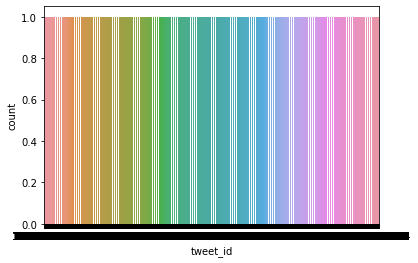

In [73]:
sns.countplot('tweet_id', data=df2)

* FEETURE ENGEERING

In [78]:
df2['lenght'] = df2['tweet_id'].apply(len)

TypeError: object of type 'int' has no len()